# Experimento: Video Games Rating By 'ESRB'

## Acesso e análise dos dados

In [ ]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [24]:
train_df = pd.read_csv('https://raw.githubusercontent.com/zLianK/esrb-ratings-notebook/refs/heads/main/train_esrb_rating.csv');
test_df = pd.read_csv('https://raw.githubusercontent.com/zLianK/esrb-ratings-notebook/refs/heads/main/test_esrb_rating.csv');

train_df

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [25]:
train_df.dtypes

title                       object
console                      int64
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_janguage              int64
strong_sexual_conten

## Pré-processamento

In [26]:
import numpy as np

X_train = np.array(train_df[train_df.columns[2:-1]])
y_train = np.array(train_df[train_df.columns[-1]])

X_test = np.array(test_df[test_df.columns[2:-1]])
y_test = np.array(test_df[test_df.columns[-1]])


## Processamento

### Treinamento

#### SVC

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np

params_svm = {
    'C': np.logspace(-3, 3, 5),
    'gamma': ['scale', 'auto']
}

clf_svm = RandomizedSearchCV(
    SVC(), params_svm, n_iter=10, random_state=42
)
clf_svm = clf_svm.fit(X_train, y_train)

#### RandomForestClassifier

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

params_ensemble = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

clf_ensemble = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), params_ensemble, n_iter=10, random_state=42
)
clf_ensemble = clf_ensemble.fit(X_train, y_train)

#### LogisticRegression

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

params_linear = {
    'C': np.logspace(-4, 4, 10),
}

clf_linear = RandomizedSearchCV(
    LogisticRegression(max_iter=1000), params_linear, n_iter=10, random_state=42
)
clf_linear = clf_linear.fit(X_train, y_train)

#### DecisionTreeClassifier

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

params_tree = {
    'criterion': ['entropy', 'gini',],
    'splitter': ['best'],
    'min_samples_leaf': [1, 5, 10, 20]
}

clf_tree = RandomizedSearchCV(
    DecisionTreeClassifier(), params_tree, n_iter=10, random_state=42
)
clf_tree = clf_tree.fit(X_train, y_train)

### Teste

In [31]:
y_pred_svm = clf_svm.predict(X_test)
y_pred_ensemble = clf_ensemble.predict(X_test)
y_pred_linear = clf_linear.predict(X_test)
y_pred_tree = clf_tree.predict(X_test)

## Avaliação

In [32]:
target_names = ["E", "ET", "T", "M"]

#### SVC

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           E     0.9596    0.9500    0.9548       100
          ET     0.8699    0.8492    0.8594       126
           T     0.8750    0.7000    0.7778        90
           M     0.7864    0.8804    0.8308       184

    accuracy                         0.8540       500
   macro avg     0.8727    0.8449    0.8557       500
weighted avg     0.8580    0.8540    0.8533       500



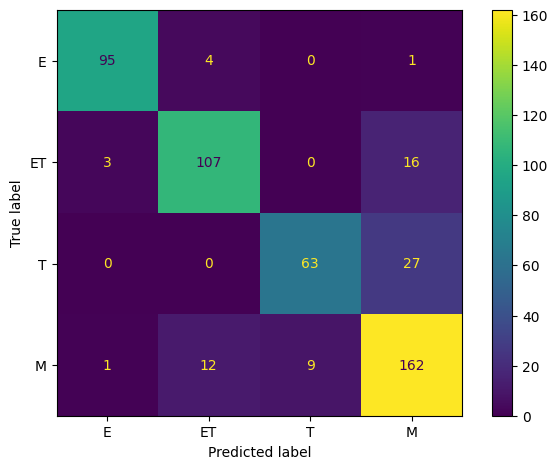

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf_svm, X_test, y_test, display_labels=target_names
)
plt.tight_layout()
plt.show()

#### RandomForestClassifier

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_ensemble, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           E     0.9423    0.9800    0.9608       100
          ET     0.8507    0.9048    0.8769       126
           T     0.8955    0.6667    0.7643        90
           M     0.8051    0.8533    0.8285       184

    accuracy                         0.8580       500
   macro avg     0.8734    0.8512    0.8576       500
weighted avg     0.8603    0.8580    0.8556       500



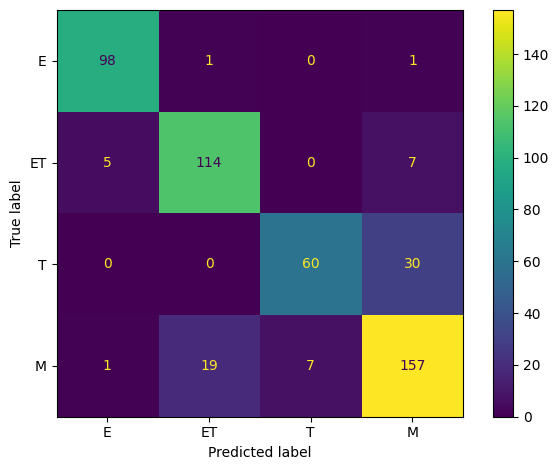

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf_ensemble, X_test, y_test, display_labels=target_names
)
plt.tight_layout()
plt.show()

#### LogisticRegression

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_linear, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           E     0.9596    0.9500    0.9548       100
          ET     0.8045    0.8492    0.8263       126
           T     0.8710    0.6000    0.7105        90
           M     0.7427    0.8315    0.7846       184

    accuracy                         0.8180       500
   macro avg     0.8444    0.8077    0.8190       500
weighted avg     0.8248    0.8180    0.8158       500



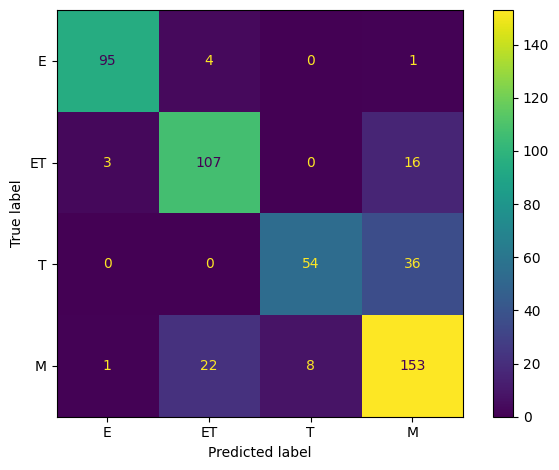

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf_linear, X_test, y_test, display_labels=target_names
)
plt.tight_layout()
plt.show()

#### DecisionTreeClassifier

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tree, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           E     0.9406    0.9500    0.9453       100
          ET     0.7972    0.9048    0.8476       126
           T     0.8551    0.6556    0.7421        90
           M     0.7914    0.8043    0.7978       184

    accuracy                         0.8320       500
   macro avg     0.8461    0.8287    0.8332       500
weighted avg     0.8342    0.8320    0.8298       500



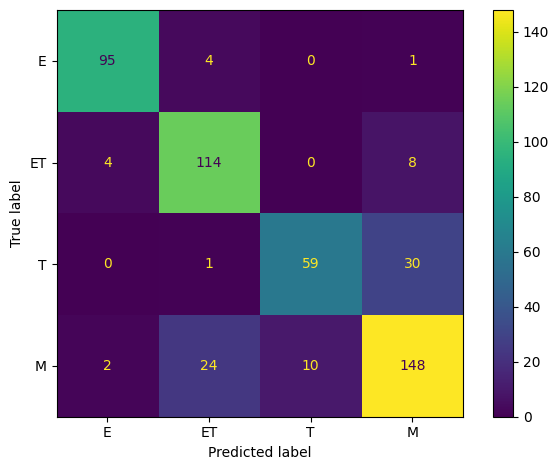

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf_tree, X_test, y_test, display_labels=target_names
)
plt.tight_layout()
plt.show()